# Aim : Prediction on Iris dadaset by svm

# Objective : To segregate the the classes of iris efficiently

## 1. Import the libraries

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score ,classification_report

In [217]:
pip install mlxtend  

In [218]:
from mlxtend.plotting import plot_decision_regions

## 2. Data Collection / Import dataset

In [245]:
df = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv')

In [246]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 3.Exploratory Data Analyasis

### 1. Head

In [97]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2.Tail

In [98]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### 3.shape

In [99]:
df.shape

(150, 6)

### 4.size

In [100]:
df.size

900

### 5.Columns

In [101]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### 6.dtypes

In [102]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 7.Info

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 8. Check Missing Values

In [104]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 9.Check Duplicates

In [105]:
df.duplicated().sum()

0

### 10.Skewness

In [106]:
df.skew()

C:\Users\Pritam\AppData\Local\Temp/ipykernel_11292/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

### 11.correleation

In [107]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

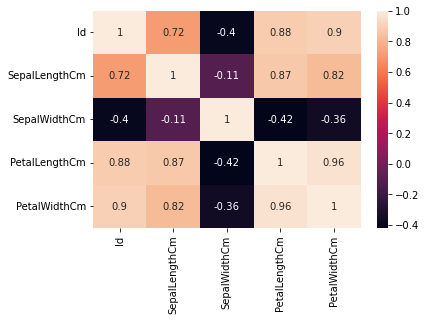

In [108]:
sns.heatmap(df.corr() , annot = True )

### 12.Describe

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


### 13.categories / classes

In [110]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [111]:
unique_value = df['Species'].value_counts().index

In [112]:
unique_value

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

## 4.Data Visualization

### 1.Countplot

In [113]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

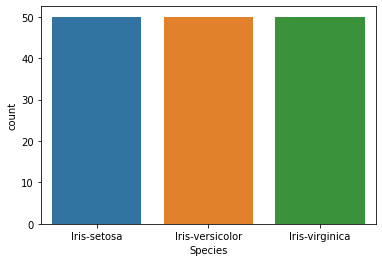

In [114]:
sns.countplot(df['Species'])

### 2.Pieplot

In [124]:
index = df['Species'].value_counts().index

In [125]:
index

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [128]:
value = df['Species'].value_counts().values

In [129]:
value

array([50, 50, 50], dtype=int64)

([<matplotlib.patches.Wedge at 0x19b7218d160>,
 [Text(0.6499999648639682, 1.125833045205567, 'Iris-setosa'),
  Text(-1.2999999999999945, -1.2171478395895002e-07, 'Iris-versicolor'),
  Text(0.6500001756801507, -1.1258329234907698, 'Iris-virginica')],
 [Text(0.3999999783778265, 0.6928203355111181, '33%'),
  Text(-0.7999999999999966, -7.490140551320001e-08, '33%'),
  Text(0.40000010811086195, -0.6928202606097045, '33%')])

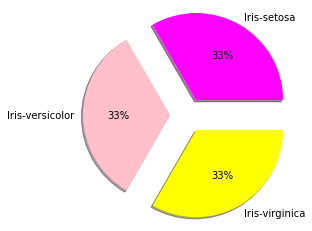

In [131]:

plt.pie(value,
    explode=(0.2,0.2,0.2),
    labels = index,
    colors=['magenta','pink','yellow'],
    autopct='%1.0f%%',
    pctdistance=0.6,
    shadow=True,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    normalize=None,
    data=None)

### 3.Pairplot

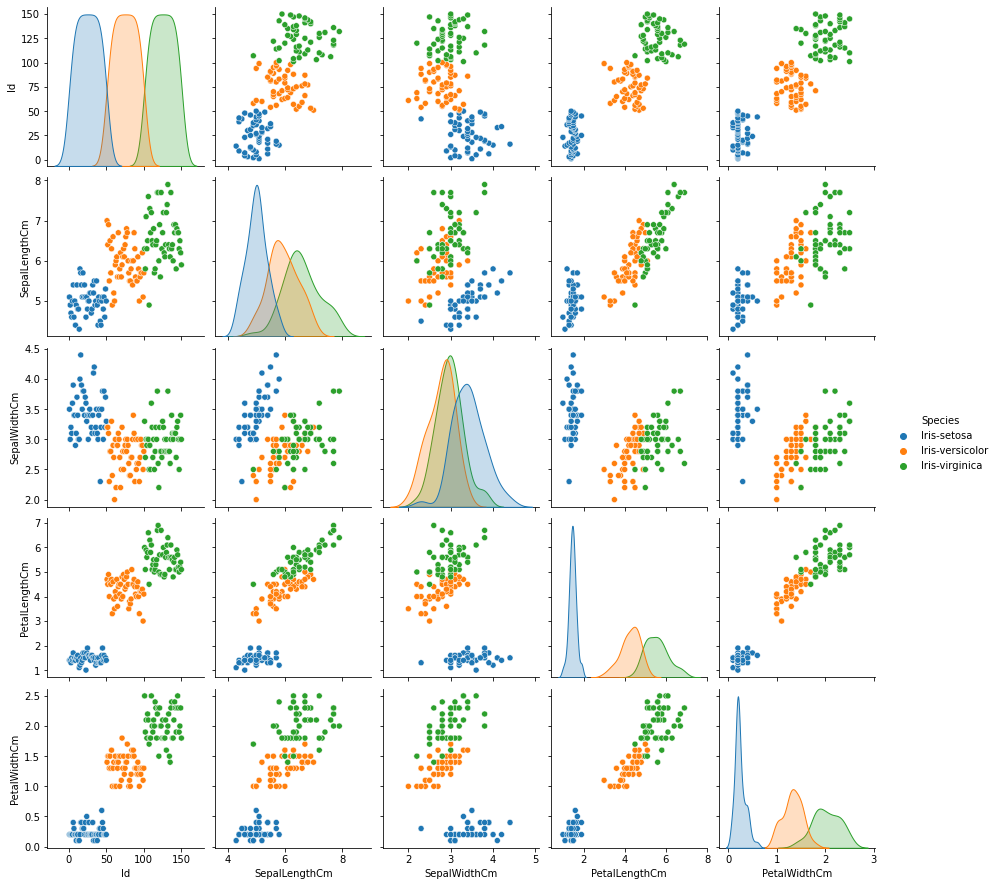

In [132]:
sns.pairplot(df , hue = 'Species')

### 4.Histplot

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

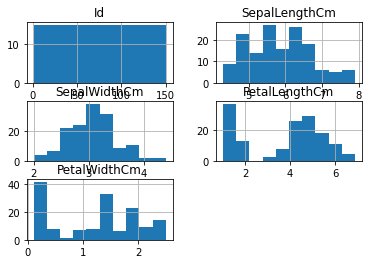

In [135]:
df.hist()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

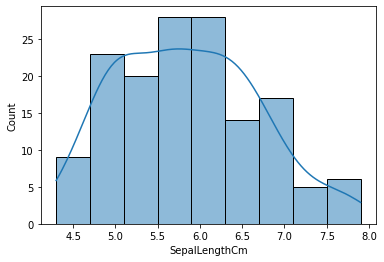

In [140]:
sns.histplot(df['SepalLengthCm'] , kde = True)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

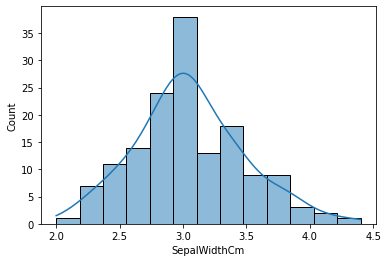

In [142]:
sns.histplot(df['SepalWidthCm'] , kde = True)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

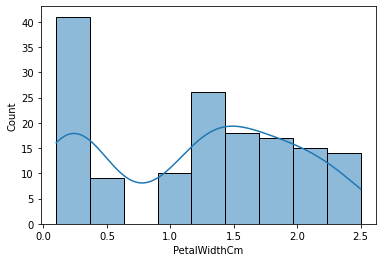

In [143]:
sns.histplot(df['PetalWidthCm'] , kde = True)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

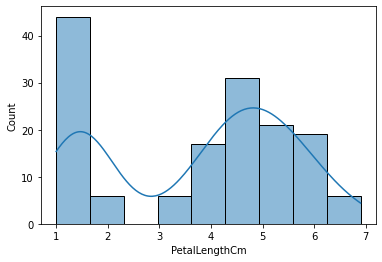

In [144]:
sns.histplot(df['PetalLengthCm'] , kde = True)

### 5.Boxplot

<AxesSubplot:>

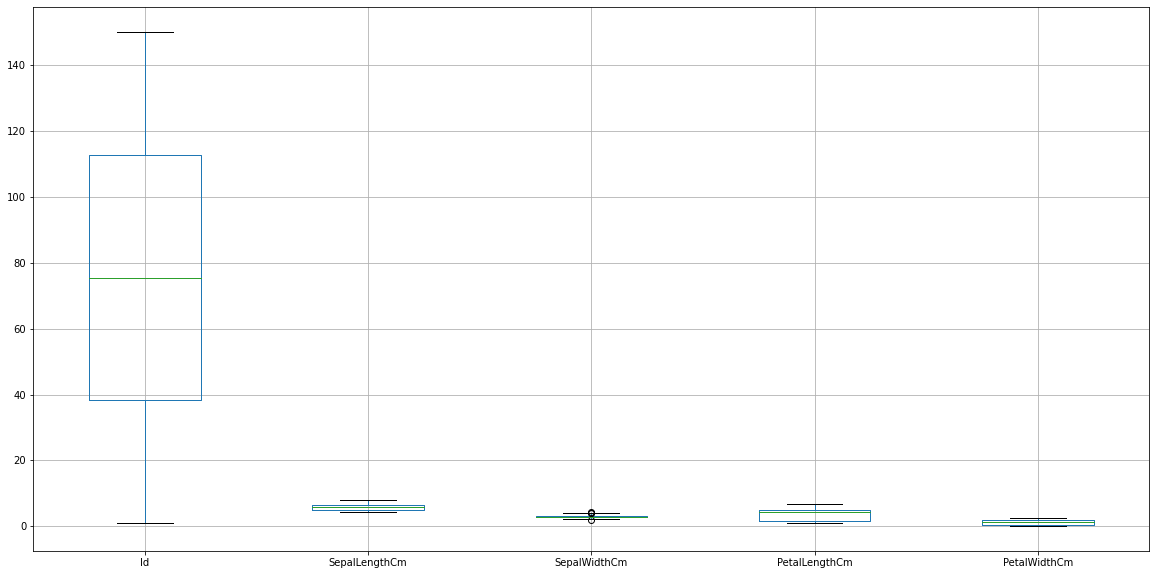

In [148]:
plt.figure(figsize= (20 ,10))
df.boxplot()

### 6.Scatterplot

In [155]:
from sklearn.preprocessing import  LabelEncoder
labels = LabelEncoder()
df['Species'] = labels.fit_transform(df['Species'])

#### Scatterplot sepallength vs petallength

Text(0.5, 1.0, 'Sepal Length vs Petal Length')

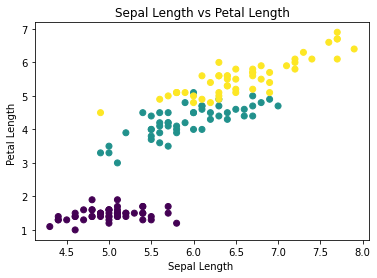

In [157]:
c = df['Species']
plt.scatter(df['SepalLengthCm'] , df['PetalLengthCm'] , c =c )
plt.xlabel('Sepal Length ')
plt.ylabel('Petal Length ')
plt.title('Sepal Length vs Petal Length')

### scatterplot sepalwidth vs petalwidth

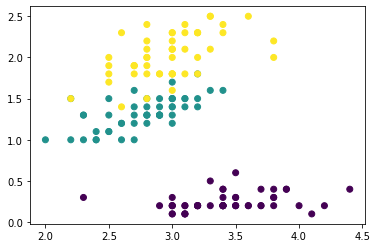

In [159]:
plt.scatter(df['SepalWidthCm'] , df['PetalWidthCm'] , c = c)

## 5.Data Preprocessing

### 1.LabelEncoder

In [260]:
from sklearn.preprocessing import LabelEncoder

In [261]:
label = LabelEncoder()

In [262]:
df['Species'] = label.fit_transform(df['Species'])

In [263]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### 1.Data split into independent and dependent variable

In [264]:
x =df.drop(labels = ['Id','SepalWidthCm' , 'PetalWidthCm' ,'Species'], axis = 1)

In [265]:
x.head(5)

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [266]:
y = df.loc[: ,'Species']

In [267]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

### Data split into train and test 

In [268]:
x_train, x_test , y_train, y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

## 6. Model Building

In [269]:
model = svm.SVC(kernel = 'linear')

In [270]:
model

SVC(kernel='linear')

##### Fit the training data

In [271]:
model.fit(x_train , y_train)

SVC(kernel='linear')

### prediction Output

In [272]:
y_pred = model.predict(x_test)

In [273]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Data Segrigation for Training data

#### Training Accuracy

In [277]:
Training_accuracy = model.score(x_train , y_train)

In [278]:
Training_accuracy

0.95

In [274]:
x_train = np.array(x_train)
y_train = np.array(y_train)

Text(0.5, 1.0, 'Segregate the data of Species of Training data')

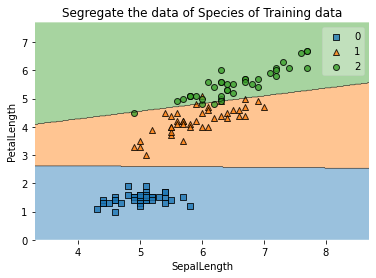

In [276]:
plot_decision_regions(x_train,
    y_train,
    clf = model,
    legend=1)

plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('Segregate the data of Species of Training data')

### Data Segrigation for Testing data

#### Testing Accuracy

In [279]:
model.score(x_test , y_test)

1.0

In [282]:
x_test = np.array(x_test)
y_test = np.array(y_test)

Text(0.5, 1.0, 'Segregate the data of Species of Testing data')

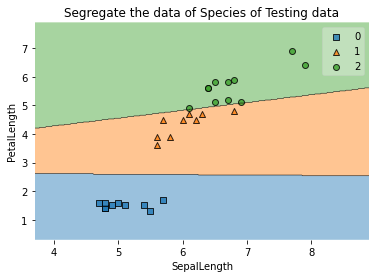

In [285]:
plot_decision_regions(x_test , y_test , clf = model , legend = 1)
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('Segregate the data of Species of Testing data')

### Now for petalLength and petalWidth

In [294]:
x1 = df.loc[:,['SepalWidthCm' ,'PetalWidthCm' ]]

In [295]:
x1.head(5)

,SepalWidthCm,PetalWidthCm
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [299]:
y1 = df.loc[:,'Species']

In [300]:
y1

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [303]:
x_train_1,x_test_1 , y_train_1 , y_test_1 = train_test_split(x1 , y1 , test_size = 0.20 , random_state = 42)

#### model for test

In [304]:
model_1 = svm.SVC(kernel = 'linear')

In [305]:
model_1

SVC(kernel='linear')

#### fit the training data

In [306]:
model_1.fit(x_train_1 , y_train_1)

SVC(kernel='linear')

In [307]:
y_pred_1 = model_1.predict(x_test_1)

In [308]:
y_pred_1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Data Segrigation for Training data

### Training Accuracy

In [312]:
training_accuracy = model_1.score(x_train_1, y_train_1)

In [313]:
training_accuracy

0.95

In [318]:
x_train_1 = np.array(x_train_1)
y_train_1 = np.array(y_train_1)

Text(0.5, 1.0, 'Segregate the data of Species of Training data')

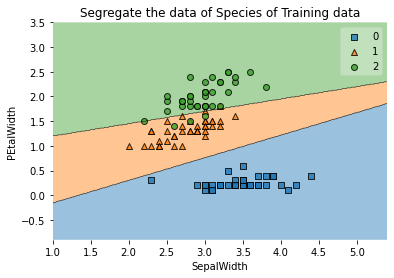

In [320]:
plot_decision_regions(x_train_1, y_train_1, clf = model_1 , legend = 1)
plt.xlabel('SepalWidth')
plt.ylabel('PEtalWidth')
plt.title('Segregate the data of Species of Training data')

### Data Segrigation for Testing data

#### Testing Accuracy

In [321]:
testing_accuracy = model_1.score(x_test_1 , y_test_1)

In [322]:
testing_accuracy

1.0

In [323]:
x_test_1 = np.array(x_test_1)
y_test_1 = np.array(y_test_1)

Text(0.5, 1.0, 'Data Segrigation for Testing data')

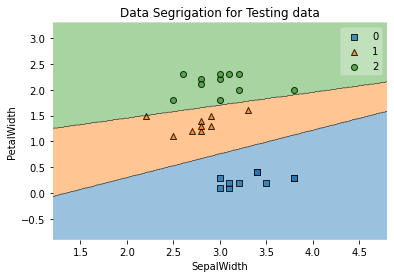

In [324]:
plot_decision_regions(x_test_1 , y_test_1 , clf = model_1 , legend  = 1)
plt.xlabel('SepalWidth')
plt.ylabel('PetalWidth')
plt.title('Data Segrigation for Testing data')